In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_50411_R')

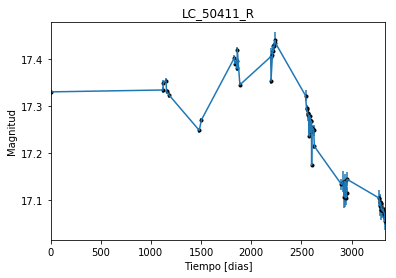

In [2]:
data = np.genfromtxt('LC_50411_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_50411_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

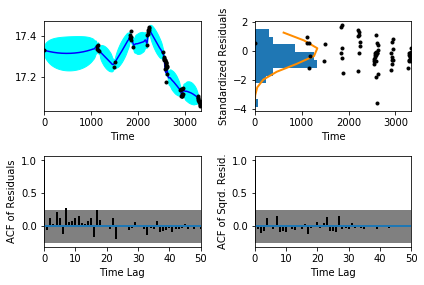

In [5]:
sample.assess_fit()

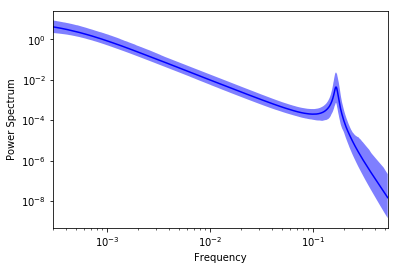

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_50411_R')

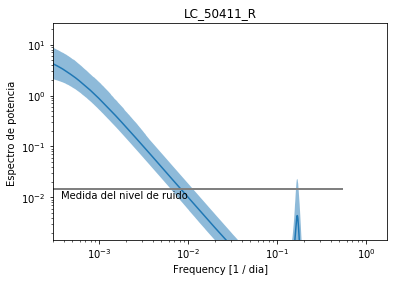

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50411_R')

Text(0.5,1,'Prediccion , valor esperado LC_50411_R')

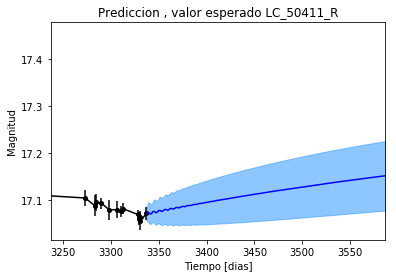

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_50411_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_50411_R')

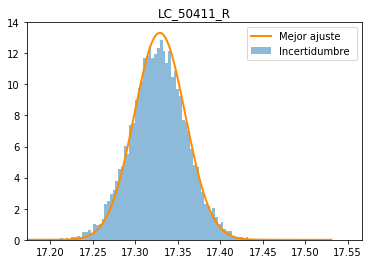

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_50411_R')

Text(0.5,1,'Interpolacion, camino simulado LC_50411_R')

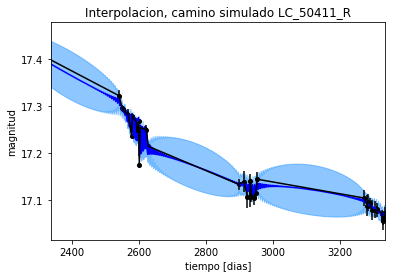

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50411_R')

Text(0.5,1,'Interpolacion, camino simulado LC_50411_R')

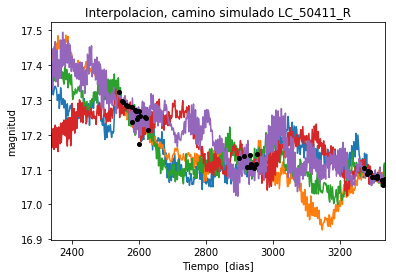

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50411_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 352.283253637
Median: 0.0049095873647
Standard deviation: 0.00279654133103
68% credibility interval: [ 0.0028222   0.00782967]
95% credibility interval: [ 0.00149978  0.01185317]
99% credibility interval: [ 0.00086903  0.01551727]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 352.283253637
Median: 0.0049095873647
Standard deviation: 0.00279654133103
68% credibility interval: [ 0.0028222   0.00782967]
95% credibility interval: [ 0.00149978  0.01185317]
99% credibility interval: [ 0.00086903  0.01551727]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 318.443505459
Median: 0.374510014427
Standard deviation: 0.276130797563
68%

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 929.873743112
Median: 164.310608871
Standard deviation: 1.9204221209
68% credibility interval: [ 162.16800088  165.75641907]
95% credibility interval: [ 159.2411902   166.65002712]
99% credibility interval: [ 156.99815841  166.94665616]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 313.784791696
Median: 2.42497687225
Standard deviation: 1.74809607987
68% credibility interval: [ 1.04077897  4.90968376]
95% credibility interval: [ 0.42949107  6.43292556]
99% credibility interval: [ 0.0519052   6.72455518]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1014.5466369
Median: 1.28606896718
Standard deviation: 3.86853408405
68% credibility interval: [ 1.15818583  1.56764594]
95% credibility interval: [ 1.08799162  2.297

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 18130.0945095
Median: 1.07336704553e-24
Standard deviation: 8.37208006817e+80
68% credibility interval: [  3.11260658e-57   2.62789987e-03]
95% credibility interval: [  6.60686487e-73   8.11261129e-01]
99% credibility interval: [  1.96094145e-74   4.42891281e+01]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1230.14993528
Median: 17.2655075337
Standard deviation: 0.0461288402391
68% credibility interval: [ 17.2234522   17.31070893]
95% credibility interval: [ 17.17494365  17.35897495]
99% credibility interval: [ 17.13838261  17.39294099]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 916.299922312
Median: 0.168646768402
Standard deviation: 0.0977100626038
68% credibility interval: [ 0.16451818  0.17340269]
95% credibility interval: [ 0.16033842  0.18554059]
99% credibility interval: [ 0.15709895  0.837576  ]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 916.299922312
Median: 0.168646768402
Standard deviation: 0.0977100626038
68% credibility interval: [ 0.16451818  0.17340269]
95% credibility interval: [ 0.16033842  0.18554059]
99% credibility interval: [ 0.15709895  0.837576  ]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 174.183499754
Median: 0.0
Standard deviation: 6.48715084777e-05
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 929.873743112
Median: 164.310608871
Standard deviation: 1.9204221209
68% credibility interval: [ 162.16800088  165.75641907]
95% credibility interval: [ 159.2411902   166.65002712]
99% credibility interval: [ 156.99815841  166.94665616]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 597.861055738
Median: 0.0084802129428
Standard deviation: 0.0059155012549
68% credibility interval: [ 0.00638434  0.01155418]
95% credibility interval: [ 0.00494356  0.01751911]
99% credibility interval: [ 0.00418615  0.05598223]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1474.43923916
Median: 0.893697088021
Standard deviation: 0.171365866769
68% credibility interval: [ 0.74971317  1.07300863]
95% credibility interval: [ 0.63299181  1.30703753]
99% credibility interval: [ 0.57292341  1.51065332]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 958.715631541
Median: 0.0164364845212
Standard deviation: 0.108667233367
68% credibility interval: [ 0.00717665  0.03421236]
95% credibility interval: [ 0.00341981  0.05897579]
99% credibility interval: [  1.24562112e-04   8.92680566e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 352.283253637
Median: (-0.0308478471942-1.02775651802j)
Standard deviation: 0.614181829068
68% credibility interval: [-0.04919527-1.05991665j -0.01773239-1.03319202j]
95% credibility interval: [-0.07447569-1.02140477j -0.00942337-1.06915031j]
99% credibility interval: [-0.09749787-1.1368497j  -0.00546030-1.06166403j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 352.283253637
Median: (-0.0308478471942+1.02775651802j)
Standard deviation: 0.614181829068
68% credibility interval: [-0.04919527+1.05991665j -0.01773239+1.03319202j]
95% credibility interval: [-0.07447569+1.02140477j -0.00942337+1.06915031j]
99% credibility interval: [-0.09749787+1.1368497j  -0.00546030+1.06166403j]
Posterior summary for parameter ar_roots  